In [ ]:
import numpy as np
from matplotlib import pyplot as plt

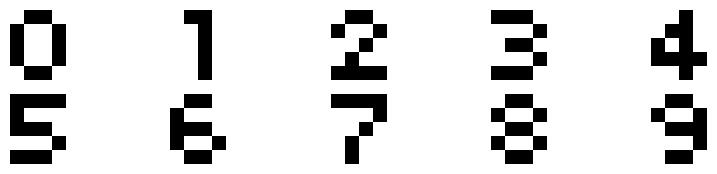

In [4]:
data = np.zeros((10, 5, 4), dtype=int)

digits = [
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 0, 0, 1],
        [0, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 1, 1, 1]
    ]),
    np.array([
        [1, 1, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 0],
        [0, 0, 0, 1],
        [1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 1, 0],
        [1, 1, 1, 1],
        [0, 0, 1, 0]
    ]),
    np.array([
        [1, 1, 1, 1],
        [1, 0, 0, 0],
        [1, 1, 1, 0],
        [0, 0, 0, 1],
        [1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 0],
        [1, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 0]
    ]),
    np.array([
        [1, 1, 1, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 1],
        [0, 0, 0, 1],
        [0, 1, 1, 0]
    ])
]

for i in range(10):
    data[i] = digits[i]

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(1-data[i], cmap='gray')
    plt.axis('off')
plt.show()


In [60]:
class Perceptron:
    def __init__(self, input_size, output_size, learning_rate=0.05):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.zeros(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def mae_derivative(self, output, target):
        return 2*(output - target)

    def train(self, X, y, n_epochs):
        for epoch in range(n_epochs):
            for i in range(len(X)):
                x = X[i].flatten()
                target = np.zeros(self.output_size)
                target[y[i]] = 1

                output = self.sigmoid(np.dot(x, self.weights) + self.bias)
                
                error = target - output
                
                mae_grad = self.mae_derivative(output, target)
                adjustment = self.learning_rate * mae_grad * self.sigmoid_derivative(output)

                self.weights -= np.outer(x, adjustment)
                self.bias -= adjustment

    def predict(self, X):
        x = X.flatten()
        output = self.sigmoid(np.dot(x, self.weights) + self.bias)
        return np.argmax(output)
    
    
    def predict_proba(self, X):
        x = X.flatten()
        output = self.sigmoid(np.dot(x, self.weights) + self.bias)
        return output
    

In [ ]:
labels = np.arange(10)

input_size = 5 * 4
output_size = 10
perceptron = Perceptron(input_size, output_size)
perceptron.train(data, labels, n_epochs=2000)

for i in range(10):
    prediction = perceptron.predict(data[i])
    print(f"Предсказано: {prediction}, Метка: {labels[i]}")

1


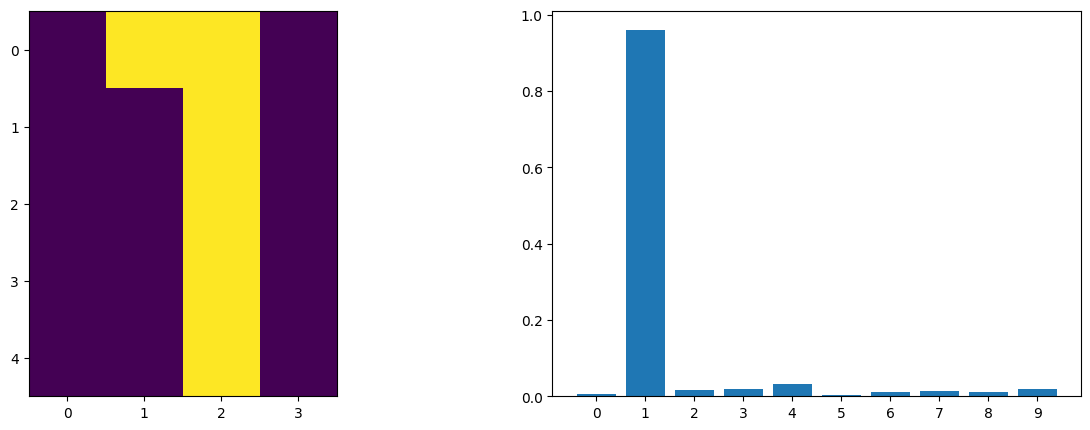

In [77]:
i = 1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
print(perceptron.predict(data[i]))
ax[0].imshow(data[i])
ax[1].bar(np.arange(10), perceptron.predict_proba(data[i]), tick_label = np.arange(10))
fig.show()


In [ ]:
perceptron.predict_proba(data[i])